In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

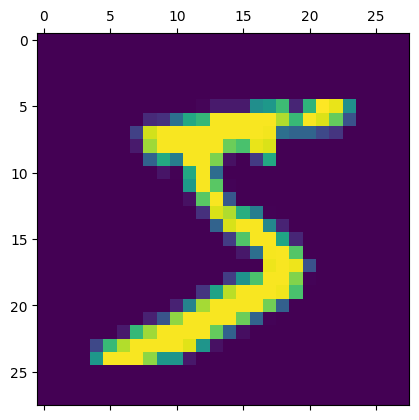

In [3]:
plt.matshow(X_train[0]) ##matshow use for displaying an array as a matrix in new figure window.

In [4]:
y_train[0]

5

In [5]:
X_train.shape

(60000, 28, 28)

Như ta thấy thì X_train có hình dạng ở một mảng 2 chiều 28x28 nên bước tiếp theo chúng ta cần phải làm phẳng mảng 2 chiều (flatten) để thành mảng 1 chiều => 784

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [8]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [9]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') 
    ##Lớp Dense là một lớp nơ ron đơn giản mà trong đó mỗi nơ ron nhận giá trị input từ tất cả các neuron ở lớp trước đó.
    ##tham số '10' đầu tiên là số lượng output ở đây là nhận dạng ký tự viết tay từ 0-9 nên sẽ có 10 output.
    ##còn input là 784 là mảng ta đã flatten ở trên.
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 4s 1ms/step - loss: 0.4661 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2737 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2665 - accuracy: 0.9256


In [11]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2687 - accuracy: 0.9265


[0.26872017979621887, 0.9265000224113464]

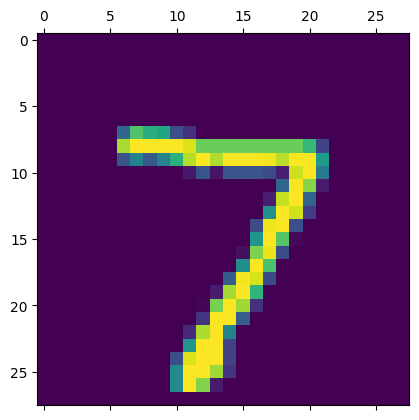

In [12]:
plt.matshow(X_test[0])

In [13]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [14]:
y_predicted[0]

array([1.8543158e-02, 1.8068091e-07, 3.8778041e-02, 9.2878705e-01,
       2.1020365e-03, 1.1455810e-01, 1.0504592e-06, 9.9971783e-01,
       7.0034705e-02, 5.9767908e-01], dtype=float32)

In [15]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [16]:
np.argmax(y_predicted[0])

7

In [17]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    6,    4,    3,    1,    0],
       [   0, 1107,    5,    2,    0,    1,    4,    2,   14,    0],
       [   6,    5,  940,   11,    8,    4,   11,    9,   33,    5],
       [   4,    0,   27,  899,    0,   38,    2,   11,   18,   11],
       [   2,    1,    8,    0,  910,    0,    8,    4,    8,   41],
       [   7,    2,    7,   20,    9,  797,   11,    3,   28,    8],
       [  14,    3,    9,    1,    8,   15,  904,    2,    2,    0],
       [   1,    5,   24,    2,    7,    1,    0,  950,    2,   36],
       [   8,    6,    8,   16,    9,   32,    9,   11,  864,   11],
       [  11,    7,    1,    8,   21,    8,    0,   19,    4,  930]])>

Text(95.72222222222221, 0.5, 'Truth')

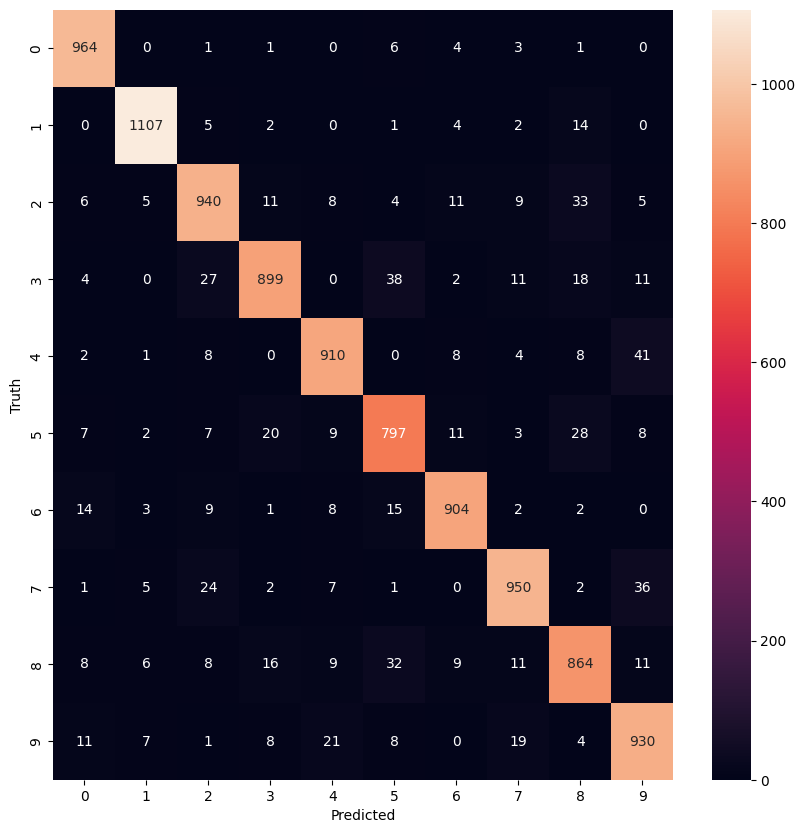

In [18]:
import seaborn as sn
plt.figure(figsize = (10, 10))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')